<a href="https://colab.research.google.com/github/AswinSamay9866/ML-Project/blob/main/Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Project Data files/Loan Prediction/train_u6lujuX_CVtuZ9i.csv")
df.shape

(614, 13)

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
df.Credit_History = df.Credit_History.astype('O')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    object 
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(3), int64(1), object(9)
memory usage: 62.5+ KB


In [ ]:
df.drop('Loan_ID', axis = 1, inplace = True)

In [ ]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.duplicated().any()

False

In [ ]:
df["Total_Income"] = df.ApplicantIncome + df.CoapplicantIncome
df.drop(["ApplicantIncome", "CoapplicantIncome"] , axis = 1 , inplace =True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,Male,No,0,Graduate,No,NaN,360.0,1.0,Urban,Y,5849.0
1,Male,Yes,1,Graduate,No,128.0,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,66.0,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,120.0,360.0,1.0,Urban,Y,4941.0
4,Male,No,0,Graduate,No,141.0,360.0,1.0,Urban,Y,6000.0


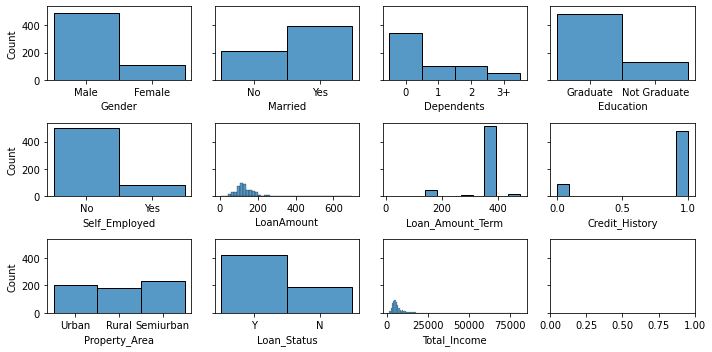

In [ ]:
ncols = 4
nrows = np.ceil(len(df.columns)/ncols).astype(int)
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, sharey=True, figsize=(10,5))

for idx, c in enumerate(df.columns):
    row = idx // ncols
    col = idx % ncols
    sns.histplot(df, x=c, ax=axs[row, col])
plt.tight_layout()

In [ ]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status', 'Total_Income'],
      dtype='object')

In [ ]:
df.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [ ]:
cat_data = []
num_data = []

for i,c in enumerate(df.dtypes):
    if c == object:
        cat_data.append(df.iloc[:, i])
    else :
        num_data.append(df.iloc[:, i])

In [ ]:
cat_data = pd.DataFrame(cat_data).transpose()
num_data = pd.DataFrame(num_data).transpose()

In [ ]:
num_data.head()

,LoanAmount,Loan_Amount_Term,Total_Income
0,NaN,360.0,5849.0
1,128.0,360.0,6091.0
2,66.0,360.0,3000.0
3,120.0,360.0,4941.0
4,141.0,360.0,6000.0


In [ ]:
cat_data = cat_data.apply(lambda x:x.fillna(x.value_counts().index[0]))
cat_data.isnull().sum().any()

False

In [ ]:
num_data = num_data.fillna(method='bfill')
num_data.isnull().sum().any()

False

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le =LabelEncoder()

target_values = {'Y': 0 , 'N' : 1}

target = cat_data['Loan_Status']
cat_data.drop('Loan_Status', axis=1, inplace=True)

target = target.map(target_values)
cat_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
0,Male,No,0,Graduate,No,1.0,Urban
1,Male,Yes,1,Graduate,No,1.0,Rural
2,Male,Yes,0,Graduate,Yes,1.0,Urban
3,Male,Yes,0,Not Graduate,No,1.0,Urban
4,Male,No,0,Graduate,No,1.0,Urban


In [ ]:

for i in cat_data:
    cat_data[i] = le.fit_transform(cat_data[i])

In [ ]:
cat_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
0,1,0,0,0,0,1,2
1,1,1,1,0,0,1,0
2,1,1,0,0,1,1,2
3,1,1,0,1,0,1,2
4,1,0,0,0,0,1,2


In [ ]:
df1 = pd.concat([cat_data, num_data, target], axis=1)
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,LoanAmount,Loan_Amount_Term,Total_Income,Loan_Status
0,1,0,0,0,0,1,2,128.0,360.0,5849.0,0
1,1,1,1,0,0,1,0,128.0,360.0,6091.0,1
2,1,1,0,0,1,1,2,66.0,360.0,3000.0,0
3,1,1,0,1,0,1,2,120.0,360.0,4941.0,0
4,1,0,0,0,0,1,2,141.0,360.0,6000.0,0


In [ ]:
X = pd.concat([cat_data,num_data], axis =1)
y = target

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train, test in sss.split(X, y):
    X_train, X_test = X.iloc[train], X.iloc[test]
    y_train, y_test = y.iloc[train], y.iloc[test]
    
print('X_train shape', X_train.shape)
print('y_train shape', y_train.shape)
print('X_test shape', X_test.shape)
print('y_test shape', y_test.shape)

# almost same ratio
print('\nratio of target in y_train :',y_train.value_counts().values/ len(y_train))
print('ratio of target in y_test :',y_test.value_counts().values/ len(y_test))
print('ratio of target in original_data :',df['Loan_Status'].value_counts().values/ len(df))

X_train shape (491, 10)
y_train shape (491,)
X_test shape (123, 10)
y_test shape (123,)

ratio of target in y_train : [0.68635438 0.31364562]
ratio of target in y_test : [0.69105691 0.30894309]
ratio of target in original_data : [0.68729642 0.31270358]


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

models = {
    'LogisticRegression': LogisticRegression(random_state=42),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'SVC': SVC(random_state=42),
    'RandomForestClassifier': RandomForestClassifier(n_estimators = 5 ,max_depth=10, random_state=42)
}

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, log_loss, accuracy_score

def loss(y_true, y_pred, retu=False):
    pre = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    loss = log_loss(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    
    if retu:
        return pre, rec, f1, loss, acc
    else:
        print('  pre: %.3f\n  rec: %.3f\n  f1: %.3f\n  loss: %.3f\n  acc: %.3f' % (pre, rec, f1, loss, acc))

In [ ]:

def train_eval_train(models, X, y):
    for name, model in models.items():
        print(name,':')
        model.fit(X, y)
        loss(y, model.predict(X))
        print('-'*30)
        
train_eval_train(models, X_train, y_train)

LogisticRegression :
  pre: 0.930
  rec: 0.429
  f1: 0.587
  loss: 6.542
  acc: 0.811
------------------------------
KNeighborsClassifier :
  pre: 0.648
  rec: 0.370
  f1: 0.471
  loss: 9.004
  acc: 0.739
------------------------------
SVC :
  pre: 1.000
  rec: 0.019
  f1: 0.038
  loss: 10.622
  acc: 0.692
------------------------------
RandomForestClassifier :
  pre: 0.957
  rec: 0.727
  f1: 0.827
  loss: 3.306
  acc: 0.904
------------------------------


In [ ]:
from sklearn.model_selection import StratifiedKFold , cross_val_score, GridSearchCV
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

for name,model in models.items():
  print(name , " - " ,cross_val_score(model, X_train , y_train, cv=skf).mean())


LogisticRegression  -  0.8085961657390228
KNeighborsClassifier  -  0.6436404864976293
SVC  -  0.6802308802308803
RandomForestClassifier  -  0.771902700474129


In [ ]:
train_eval_train(models, X_train, y_train)

LogisticRegression :
  pre: 0.930
  rec: 0.429
  f1: 0.587
  loss: 6.542
  acc: 0.811
------------------------------
KNeighborsClassifier :
  pre: 0.648
  rec: 0.370
  f1: 0.471
  loss: 9.004
  acc: 0.739
------------------------------
SVC :
  pre: 1.000
  rec: 0.019
  f1: 0.038
  loss: 10.622
  acc: 0.692
------------------------------
RandomForestClassifier :
  pre: 0.957
  rec: 0.727
  f1: 0.827
  loss: 3.306
  acc: 0.904
------------------------------


In [ ]:

def test_eval_test(models, X, y , Xt , yt):
    for name, model in models.items():
        print(name,':')
        model.fit(X, y)
        loss(yt, model.predict(Xt))
        print('-'*30)
        
test_eval_test(models, X_train, y_train , X_test , y_test)

LogisticRegression :
  pre: 0.850
  rec: 0.447
  f1: 0.586
  loss: 6.739
  acc: 0.805
------------------------------
KNeighborsClassifier :
  pre: 0.261
  rec: 0.158
  f1: 0.197
  loss: 13.759
  acc: 0.602
------------------------------
SVC :
  pre: 0.000
  rec: 0.000
  f1: 0.000
  loss: 10.671
  acc: 0.691
------------------------------
RandomForestClassifier :
  pre: 0.719
  rec: 0.605
  f1: 0.657
  loss: 6.739
  acc: 0.805
------------------------------


  pre: 0.719
  rec: 0.605
  f1: 0.657
  loss: 6.739
  acc: 0.805


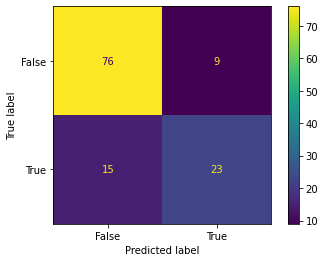

In [ ]:
from sklearn import metrics
RF = RandomForestClassifier(n_estimators = 5 ,max_depth=10, random_state=42)
RF.fit(X_train , y_train)
y_pred = RF.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
loss(y_test , y_pred)
cm_display.plot()
plt.show()

In [ ]:
param_grid = [{'n_estimators':[5 ,8,9, 10, 12], 'max_features':[2,3,4,5,6],'max_depth': [3,5,8,9, 10, 12]}]
grid_search = GridSearchCV(RF,param_grid,cv = 7, scoring = 'f1')
grid_search.fit(X_train,y_train)
print(grid_search.best_estimator_)
print(grid_search.best_params_)

RandomForestClassifier(max_depth=8, max_features=4, n_estimators=8,
                       random_state=42)
{'max_depth': 8, 'max_features': 4, 'n_estimators': 8}


  pre: 0.690
  rec: 0.526
  f1: 0.597
  loss: 7.582
  acc: 0.780


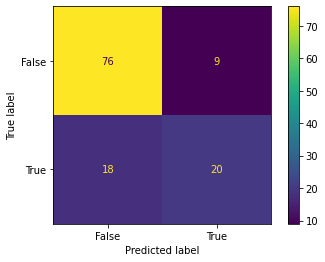

In [ ]:
y_predg = grid_search.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_predg)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
loss(y_test , y_predg)
cm_display.plot()
plt.show()

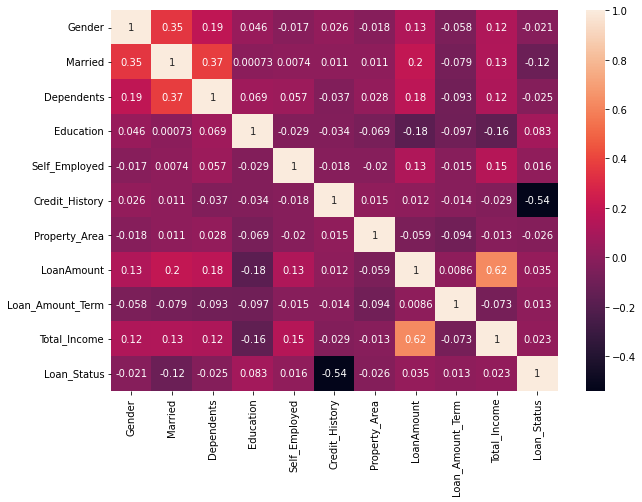

In [ ]:
data_corr = pd.concat([X_train, y_train], axis=1)
corr = data_corr.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True);